In [2]:
%pip install nltk

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("flipkart.csv")  
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [5]:
df['sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
df[['Review', 'Rating', 'sentiment']].head()


,Review,Rating,sentiment
0,Best under 60k Great performanceI got it for a...,5,1
1,Good perfomence...,5,1
2,Great performance but usually it has also that...,5,1
3,My wife is so happy and best product 👌🏻😘,5,1
4,"Light weight laptop with new amazing features,...",5,1


In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_review'] = df['Review'].apply(clean_text)
df[['Review', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,Review,cleaned_review
0,Best under 60k Great performanceI got it for a...,best k great performancei got around battery b...
1,Good perfomence...,good perfomence
2,Great performance but usually it has also that...,great performance usually also gaming laptops ...
3,My wife is so happy and best product 👌🏻😘,wife happy best product
4,"Light weight laptop with new amazing features,...",light weight laptop new amazing features batte...


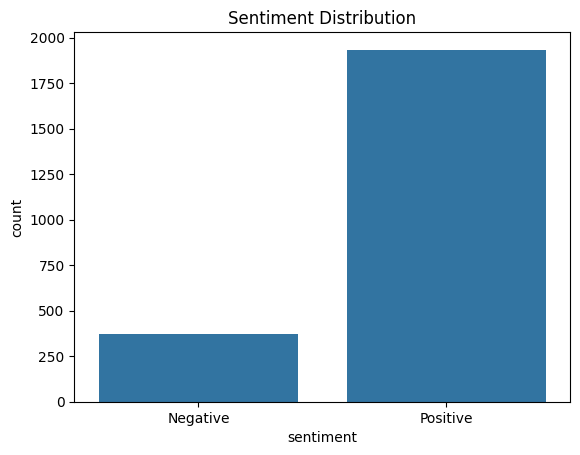

In [7]:
sns.countplot(x='sentiment', data=df)
plt.xticks([0,1], ['Negative', 'Positive'])
plt.title("Sentiment Distribution")
plt.show()


In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9023861171366594


In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.36      0.52        67
           1       0.90      0.99      0.95       394

    accuracy                           0.90       461
   macro avg       0.91      0.68      0.73       461
weighted avg       0.90      0.90      0.88       461



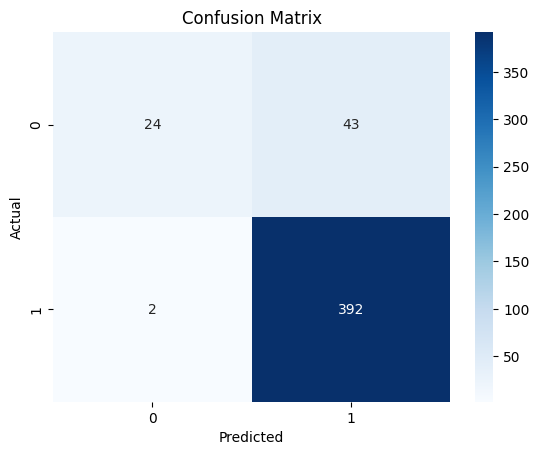

In [13]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
sample_review = ["Battery backup is poor but performance is good"]
sample_clean = [clean_text(sample_review[0])]
sample_vec = tfidf.transform(sample_clean)

prediction = model.predict(sample_vec)

print("Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Sentiment: Positive
